## Task
Some notes about matplotlib/Seaborn

## Notebook summary
* Importing
* Input, Interfaces, Backends, Jupyter notebooks
* Objects - Figure, Axes
* Styles, Stylesheets
* Colors, line styles, axis limits & labels, title & legend, color bars
* Text, Annotation
* Ticks
* Subplots - `plt.axes`, `plt.subplot`, `plt.subplots`, `plt.subplot2Grid`,`plt.GridSpec`
* Line plots, scatter plots (differences between the 2)
* Error bars
* Contour plots
* Histograms, binning, KDE plots
* 3d plots
* Geo maps with Basemap toolkit


## References
* *Python for Data Analysis*, Wes McKinney, O'Reilly, 2012
* *Numerical Python*, Robert Johansson, APress, 2015
* *Python Data Science Handbook*, Jake VanderPlas, O'Reilly, 2016
* [PLOS Computational Biology - 10 simple rules for better figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
* [matplotlib - Choosing colors](http://matplotlib.org/1.4.1/users/colormaps.html#color-vision-deficiencies)


In [10]:
# embed static PNG images; alternative is %matplotlib notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Import libs
import matplotlib as mpl
import matplotlib.pyplot as plt


## Input
Data to matplotlib functions is 1 or more NumPy arrays. matplotlib does not support pandas. Use Seaborn with pandas.

## Interfaces
matplotlib provides 2 interfaces:

* **Stateful interface** - derived from Matlab; context-dependent; hard to re-use; useful for simple plots
* **Objected-Oriented interface** - easier for complicated plots

Both interfaces are provided by `matplotlib.pyplot`

## Backends
* Supported backends formats: PDF, PNG, PS, SVG, etc.
* Supported backend displays: Qt, GTK, Cocoa/OS X, etc.
* Backend to use can be specified in `matplotlibrc` file or using `mpl.use()` (call before importing `mpl.pyplot`)

## Jupyter notebooks
* Use `%matplotlib inline` at the beginning for embedded static PNG images in the notebook instead of displaying in a new window
* Use `%matplotlib notebook` for embedded interactive plots
* No need to use `plt.show()` or `plt.draw()`
* Img format for inline backend can be specified using `%config` as:
```
%matplotlib inline
%config InlineBackend.figure_format='svg', OR
%config InlineBackend.figure_format='retina'
```


## Objects

### Figure object
* Provides canvas area for drawing
* Create: `fig, ax = plt.figure(figsize=(width, height), facecolor='')` - figsize is specified in inches
* Add axis: `fig.add_axes(left, bottom, width, height)` - all values as fractions of fig size. See also `axisbg` param to set bg color for Axes object.
---

**MATLAB-interface**
```
plt.figure()
plt.subplot(2,1,1) # create 1st subplot, set active axis
plt.plot(...)

plt.subplot(2,1,2) # create 2nd subplot, set active axis
plt.plot(...)
```

**OO-interface to fig & plot**

Explicitly add an Axes object
```
fig = plt.figure(...)
ax = fig.add_axes(...)
ax.plot(...)
ax.set_xlabel(...)
...
```

Automatically add an Axes object
```
fig, ax = plt.subplots(2)
ax[0].plot(...)
ax[1].plot(...)
```

* Overall title: `suptitle("title")`
* Save figure: `fig.savefig(<filename>)` - file format is inferred from filename extension by default. Output format depends on available backends. 
```
fig = plt.figure()
plt.plot(<whatever>)
fig.savefig(<filename>)
```


In [14]:
# get supported file types for saving figure
fig = plt.figure();
fig.canvas.get_supported_filetypes()


{u'eps': u'Encapsulated Postscript',
 u'pdf': u'Portable Document Format',
 u'pgf': u'PGF code for LaTeX',
 u'png': u'Portable Network Graphics',
 u'ps': u'Postscript',
 u'raw': u'Raw RGBA bitmap',
 u'rgba': u'Raw RGBA bitmap',
 u'svg': u'Scalable Vector Graphics',
 u'svgz': u'Scalable Vector Graphics'}

### Axes object
* Figure object contains 1 or more Axes object
* Provides coordinate systems that are assigned to regions of the figure
* Determins where axis labels & ticks are placed
* Support common plot types including: line, scatter, step, bar, hist, errorbar, fill_between, quiver
  

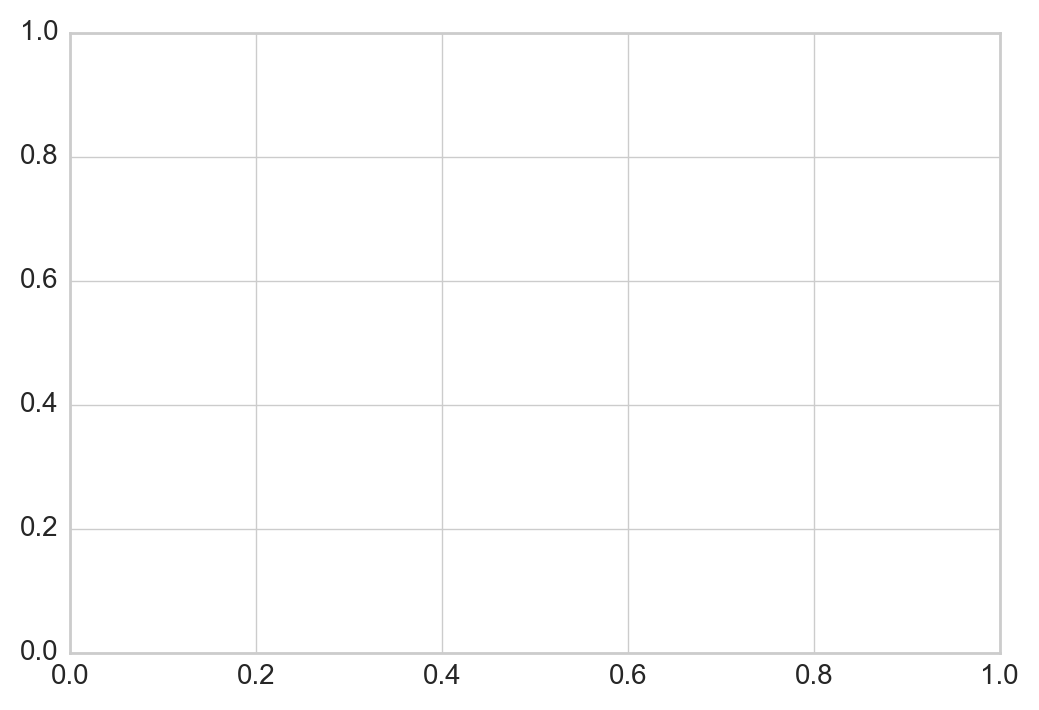

In [11]:
# Initialize figures & styles - create empty figure with axes
fig = plt.figure() # container for all elements
ax = plt.axes() # box, ticks, labels, etc.

# plot(<something>)
# plot(<something_else>)


## Styles

**Modify with rcParams**
* Default styles are defined in the runtime configuration
* Get current style settings using `print(plt.rcParams)`
* Update style settings using `plt.rcParams.update()`
* Modify this runtime config using `plt.rc()` as `plt.rc(attribute, new_value)`
* New default settings can be saved in `.matplotlib.rc` file

**Modify with Stylesheets**
* `style` module allows use of various stylesheets
* Stylesheet files must have `.mplstyle` extension
* Change style for entire session: `plt.style.use(stylename)`
* Change style temporarily: 
```
with plt.style.context(stylename)
    plot(<something>)
```

---


In [2]:
# List available styles (each of which is defined in a separate stylesheet)
plt.style.available

# Use a style - will change style for rest of session
plt.style.use('classic')
plt.style.use('seaborn-whitegrid')


---

## Colors

* by name - `blue`
* by HTML color name - `red`
* by rgbcymk short color code - `g`
* by grayscale - `0.75`
* by hex code - `#FFDE12`
* by RGB tuple - `(1, 0.4, 0.2)`

If no color specified, cycle through default colors as needed

## Line styles

* `solid`, `-`
* `dashed`, `--`
* `dashdot`, `-.`
* `dotted`, `:`
* `o` - for scatter plots
* `-o` - for line plots with markers
* custom line styles with `set_dashes()`

## Both
* `-g` - solid green
* `--k`
* `-.c`
* `:r`

---


## Axis limits

* Axis limits are set automatically but can be overridden
* `plt.xlim(a,b)` or `ax.set_xlim(a,b)`
* `plt.ylim(a,b)` or `ax.set_ylim(a,b)`
* Alternatively, use `plt.axis(xmin, xmax, ymin, ymax)` after `plt.plot()`. Also has many other params
* See also: `ax.axis('tight/equal')`

## Axis labels

* `plt.xlabel('something')` or `ax.set_xlabel()`
* `plt.ylabel('something')` or `ax.set_ylabel()`

## Title
* `plt.title()` or `ax.set_title()`

## Legends

* first: `plt.plot(x, y, linestyle, legend='something')`
* then: `plt.legend()`
* Can customize location, box, # columns, shadow, padding, element shown
* Legend ignores all attributes without a `label` attribute
* Legend will always reference objects in the plot, so it objects in legend are not in plot, then plot empty lists with legend
* Use `loc` & `bbox_to_anchor` params to specify location (inside or outside plots)
* `ncols` specifies number of columns in legend
* Multiple legends can be created using `matplotlib.legend.Legend` & `ax.add_artist()`
* OO way:
```
fig, ax = plt.subplots()
ax.plot(...)
ax.set_xlabel('')
ax.legend()
```

## Color bars
* Legend is for discrete labels of discrete points; Use color bar for continuous labels
* Color bar is on separate axes (is an instance of plt.Axes)
* `plt.colorbar()` - default: no args
* Cutomize bar by customizing colors in plot (before color bar is generated); can use color maps for this (`mpl.cm.<TAB>`)
* Types of color maps: sequential, diverging, qualitative. Use `view_colormap` to view sample color map.
* Some color maps: `viridis` (uniform brightness across range), `cubehelix` (rainbow scheme), `RdBu`, etc.
* Use `extend` param to show outliers (which might affect color scale in plot), i.e., narrow color limit. Useful for noisy images.
* For discete bars in color map, use bins param in `plt.cm.get_cmap(cmap, #bins)`
* `plt.clim` - limit color bar values
* See also: `pcolor()` & `imshow()`

## OO: Set multiple properties at once
```
ax = plt.axes()
ax.plot(x,y)
ax.set(xlim=(a,b), ylim=(c,d), xlabel='', ylabel='', title='')
```
---

## Text, Annotation

* Use `plt.text()` or `ax.text()` to add text in plot. See `matplotlib.text.Text()` for style options.
```
fig, ax = plt.plot(...)
ax.text(x, y, str, style) # where (x,y) represents data location
```
* **LaTeX**: Can specify LaTeX using `$LaTeX_expr$`. matplotlib supports a subset of LaTeX by default. To use external LaTeX engine for full LaTeX support, set `mpl.rcParams["text.usetex]=True` (uses system tex executable). Use Python raw strings - `r''` - for LaTeX exprs to prevent '\' from being interpreted as escape char (it's start of cmd in LaTeX)
* Tools to perform coordinate transforms: `matplotlib.transforms` sub-module. 
* Location of text can be specified w.r.t. data, axis or figure and the associated transforms are:
 * `ax.transData` - data coordinates transform
 * `ax.transAxes` - axes transform (units of axes dimensions)
 * `fig.transFigure` - figure transforms (units of figure dimensions)
* These transforms can be specified in the `transform` param of `ax.text()`
* Annotations can be added using `ax.annotate(text, ..., arrowprops)`
* Don't use `plt.arrow()` to draw arrows; Instead, use `plt.annotate()` and set `arrowprops` param as needed; much manual tweaking might be needed!


## Ticks

* Plot object hierarchy: Figure -> Axes -> XAxis, YAxis -> lines, ticks, labels, etc
* Ticks managed through `matplotlib.ticker` class.
* Customize ticks using the `locator` & `formatter` objects of each axis (sub-classes of `matplotlib.ticker` class)
* Hide ticks: `ax.xaxis.set_major_locator(plt.NullLocation())` - removing ticks will also remove labels
* Hide labels: `ax.yaxis.set_major_formatter(plt.NullFormatter())`
* Reduce ticks: `ax.xaxis.set_major_locator(plt.MaxNLocator(#ticks)` - specify max # ticks on axis
* Specify Tick location: `ax.xaxis.set_major_locator(plt.MajorLocator(n))` - major ticks only at multiples of `n`
* Specify Tick location: `ax.xaxis.set_minor_locator(plt.MajorLocator(n))` - minor ticks only at multiples of `n/2`
* Use `ax.xaxis.set_major_formatter(plt.FuncFormatter(format_function))` to set label for ticks
* Can also specify explicit locations for major ticks using `set_xticks()` & `set_yticks()`. Labels for these ticks can be set with `set_xticklabels()` & `set_yticklabels()`
* See `ScalarFormatter` to customize tick label
* Grids are extensions of ticks and can be drawn with `grid`. `which` param specifies if grid lines shld be drawn on major or minor axis. `axis` param specifies if grid lines shld be drawn on X or Y axis

## Other
* **Log scale plots** can be generated using `loglog()`, `semilogx()` and `semilogy()`. Or set scale of axis with `set_xscale()` and `set_yscale()` with `log` as first arg.
* **Secondary axes** can be created using `twinx()` and `twiny()`
* **Spines**: The box around the plot is made up of spines, which can be modified using `ax.spines()`. Remove spine using `ax.spines['right'].set_color('none')`. Move spine location using `set_location()`

---


## Subplots

Note: origin (0,0) of subplots seems to be in top left corner

`plt.axes()` - manually specify location of subplots
* PyLab: `plt.axes()` or `plt.axes(bottom, left, width, height)`
* OO:
```
fig =  plt.figure()
ax1 = fig.add_axes(bottom, left, width, height)
ax1.plot()
ax2 = fig.add_axes()
ax2.plot()
```

`plt.subplot()` - create a subplot within a grid
* PyLab: `plt.subplot()`
* OO: `fig.add_subplot()`
* `plt.subplot(1,2,1)` or `fig.add_subplot(1,2,1)` - left subplot
* `plt.subplot(1,2,2)` or `fig.add_subplot(1,2,2)` - right subplot
* To adjust spacing between plots: `plt.subplots_adjust(hspace, wspace)` hspace = wspace = fraction of subplot width

`plt.subplots()` - create multiple subplots at once
* `plt.subplots(#rows, #cols, sharex, sharey)` - Use sharex, sharey to remove inner labels
* Returns fig, numpy array of Axes objects. Dim of this array be 1d or 2d depending on `squeeze` arg in `subplots()`

`plt.subplot2Grid()` - create subplot in a grid
* `plt.subplot2grid((#rows, #col), (cur_row, cur_col))`
* More flexible than `subplots` but simpler than `GridSpec`. 
* Can create plots that span multiple rows or columns

`plt.GridSpec` - create specification of grid to be used by `plt.subplot()`
* Allows creation of grids where rows & cols can have different heights
```
grid = plt.GridSpec(#rows, #cols, wspace, hspace, width_ratios, height_ratios)
plt.subplot(grid[0,0]) or fig.add_subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[0,:2])
plt.subplot(grid[0,2])
```
---


## Scatter plots

* `plt.scatter` - can set style of each point individually
* `plt.plot` - all points have the same style

`plt.plot` is more effcient for large data sets compared to `plt.scatter`

---


## Error bars

* Use `plt.errorbar()`
* Interpolate for continuous errors: use `plt.plot()` and `plt.fill_between()`, where `fill_between()` values are generated using, for instance, non-parametric methods like `Gaussian Process Regression`
```
plt.plot(x, y) # data points
plt.plot(xfit, yfit) # line connecting data points
plt.fill_between(xfit, lower, upper) # fill area between lower & upper
```
* See also: `plt.fill()` in matplotlib and error bars in Seaborn
---


## Contour plots

* Use `plt.contour(x, y, z)`
* `np.meshgrid` can be used to generate coordinates for contour plots
* Color maps to use for contour plots: plt.cm.<TAB>
* Filled contour plots: `plt.contourf()`; add color bar with `plt.colorbar()`
* `plt.imshow()` to show 'smoothed' contour plot
* Contour labels: `plt.clabel()`
* Can overplot contours over image plot

---


## Histograms

**1d**
* `plt.hist(x)` to plot histogram; call multiple times to overplot (after setting suitable alpha-level)
* `counts, bin_edges = np.histogram(data)` to compute histogram w/o plotting

**2d** - tesselation of squares
* Bin along X & Y axes
* `plt.hist_2d(x, y)`
* `counts, xedges, yedges = np.histogram2d()`
* See also `np.histogramdd()`

**Hexagonal binning** - tessalation of hexagons
* `plt.hexbin(x, y)`

**Kernel density estimation** - smoothed density plots
* `scipy.stats.gaussian_kde(array[n.dim, n.samples])`
* `sklearn.neighbors.KernelDensity` 
* `statsmodels.nonparametrics.kernel_density.KDEMultivariate`
* See also Seaborn KDE plots

---


## 3d plots

* Required import: `from mpl_toolkits import mplot3d`
* Create 3d axes as:

```
fig = plt.figure()
ax = plt.axes(projection='3d') # creates an Axes3D object

# Alternatively
fig = plt.figure()
ax = Axes3D(fig)

# Alternatively
fig = plt.figure()
ax = fig.add_subplot(..., projection='3d') # only this subplot is 3d. Other subplots in figure can be 2d

# Alternatively
fig, ax = plt.subplots(#rows, #cols, subplot_kw={'projection':'3d'}) # all subplots in figure are 3d
```

* 3d line plots: `ax.plot3D(x,y,z)` 
* 3d scatter plots: `ax.scatter3D(x,y,z)` - point transparency is automatically adjusted for depth effect
* 3d contour plots: `ax.contour3D(x,y,z)` - x,y represent grid, z is value at each point of grid
* Use `ax.view_init(elevation, azimuthal_angle)` to rotate plot
* Wire frame plot: `ax.plot_wireframe(x,y,z)`. Use `rstride` & `cstride` to sample points
* Surface plot: `ax.plot_surface(x,y,z)` - each face of wireframe is a filled polygon
* Surface triangulation: `ax.plot_trisurf(x,y,z)` - create a surface using a set of triangles between adjacent points

---


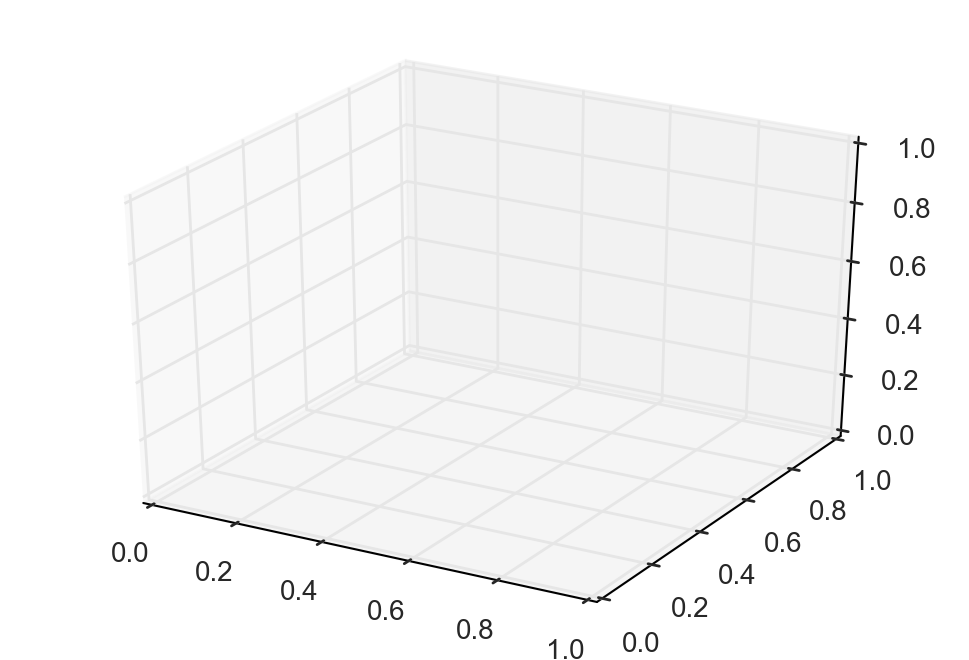

In [12]:
# Create 3d axes
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')


---

## Geo maps

* Required import: `from mpl_toolkits.basemap import Basemap`
* Might also need `PIL` package (Python2) or `pillow` package (Python3) - PIL = Python Imaging Library

```
fir = plt.figure()
m = Basemap(projection, resolution, width, height, lat_0, long_0)
m.bluemarble()
m.etopo()
...
```

Common projections include: 
* **Cylindrical** - equatorial regions are OK, poles are distorted. Sub-types: equidistant cylindrical, Mercator & cylindrical area
* **Pseudo-Cylindrical** - meridians don't have to be vertical => less distortion at the poles
* **Perspective** - view from a certain point; can only show part of map. Good for small parts of the globe. Sub-types: orthographic, gnomonic, stereographic
* **Conic** - project map onto a cone and unroll cone. Focus area is OK, more distant areas are distorted. Good for small parts of the globe. Sub-types: Lambert Confirmal Conic, Equidistant conic, Albers Equal Area

Map Background options include
* Physical boundaries
* Political boundaries
* Map features
* Whole-globe images

`resolution` param sets level of detail in map. Required for boundary-based features. Higher resolution requires more drawing time

Plotting data on Maps
* Project lat, long coords to (x, y) and use any plot
* Some plotting functions have `latlon` param that accepts lat, long coords without conversion
